In [12]:
import pickle
import numpy as np
import pandas as pd
from plotting import *

# grid_results: [gold_agreement, expected_agreement, sampled_agreement, no_possible_coaltions, entropy]
E = 12

grid_results = None
file = "4-5-1000-A-100"
with open('model_runs/debugging/' + file + '.pickle', 'rb') as handle:
    grid_results = pickle.load(handle)

avg_gold_regrets = [None] * E
avg_expected_regrets = [None] * E
avg_sampled_regrets = [None] * E
avg_possible_coalitions = [None] * E
avg_entropies = [None] * E
normalized_expected_regrets = [None] * E
normalized_sampled_regrets = [None] * E
expected_regrets_std = [None] * E
sampled_regrets_std = [None] * E

labels = [n for n in range(E)]

no_results = len(grid_results)
print("Results in grid: ", no_results)
print("Values per experiment: ",  int(no_results / E))

for e in range(E):          
    gold_regrets = [None] * int(no_results / E)
    expected_regrets = [None] * int(no_results / E)
    sampled_regrets = [None] * int(no_results / E)
    no_possible_coalitions = [None] * int(no_results / E)
    entropies = [None] * int(no_results / E)

    for i, index in enumerate(range(e, len(grid_results), E)):
        gold_regrets[i], expected_regrets[i], sampled_regrets[i], no_possible_coalitions[i], entropies[i] = grid_results[index]

    avg_gold_regrets[e] = np.sum(gold_regrets) / len(gold_regrets)

    avg_expected_regrets[e] = np.sum(expected_regrets) / len(expected_regrets)

    avg_sampled_regrets[e] = np.sum(sampled_regrets) / len(sampled_regrets)

    avg_possible_coalitions[e] = np.sum(no_possible_coalitions) / len(no_possible_coalitions)

    avg_entropies[e] = np.sum(entropies) / len(entropies)

    normalized_expected_regrets[e] = avg_expected_regrets[e] / avg_gold_regrets[e]
    normalized_sampled_regrets[e] = avg_sampled_regrets[e] / avg_gold_regrets[e]
   
    expected_regrets_std[e] = np.std(expected_regrets)
    sampled_regrets_std[e] = np.std(sampled_regrets)

Results in grid:  1200
Values per experiment:  100


In [2]:
# e = 0: no breaking points
# e = 1: one random breaking point for the largest party
# e = 2: one breaking point on the top issue of the largest party
# e = 3: one random breaking point for the largest two parties
# e = 4: one breaking point on the top issues of the two largest party
# e = 5: one random breaking point per party
# e = 6: one top issue breaking point per party
# e = 7: two random breaking points per party
# e = 8: two top issue breaking points per party
# e = 9: one random breaking point for the smallest party
# e = 10: one breaking point on the top issue of the smallest party
# e = 11: one breaking point on the top issue of the first party + vote revaluation

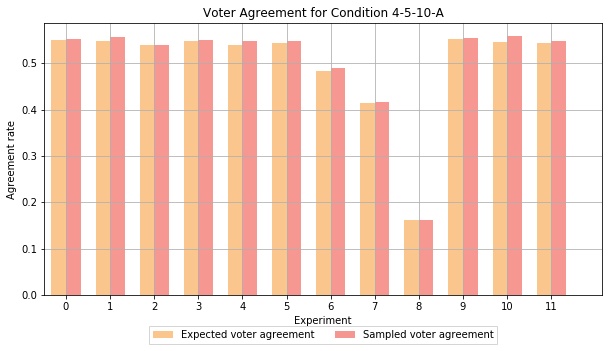

In [9]:
title = "Voter Agreement for Condition 4-5-10-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["Expected voter agreement", "Sampled voter agreement"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "agreement_4-5-10-A.png"

data = pd.DataFrame([avg_expected_regrets, avg_sampled_regrets]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

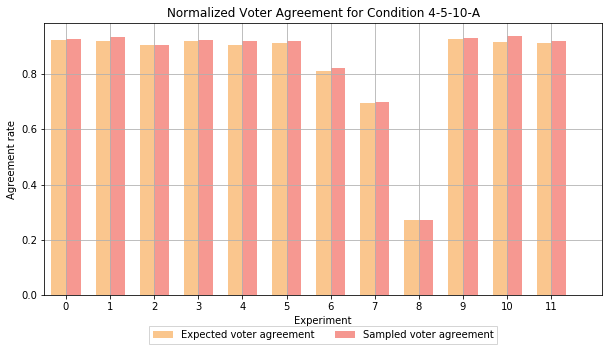

In [4]:
title = "Normalized Voter Agreement for Condition 4-5-10-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Agreement rate"
legend = ["Expected voter agreement", "Sampled voter agreement"]
colours = ['#F78F1E', '#EE3224', '#FFC222']
name = "norm_agreement_4-5-10-A.png"

data = pd.DataFrame([normalized_expected_regrets, normalized_sampled_regrets]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)

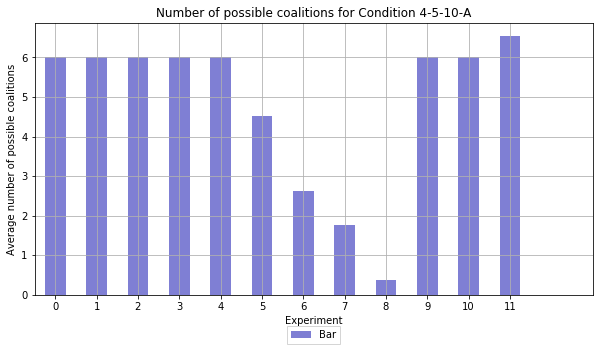

In [5]:
title = "Number of possible coalitions for Condition 4-5-10-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Average number of possible coalitions"
legend = ["Bar"]
colour = '#0000AA'
name = "coalitions_4-5-10-A.png"

data = pd.DataFrame([avg_possible_coalitions]).T
plot_bar_chart_1(data, title, xlabel, xticklabels, ylabel, legend, colour, name)

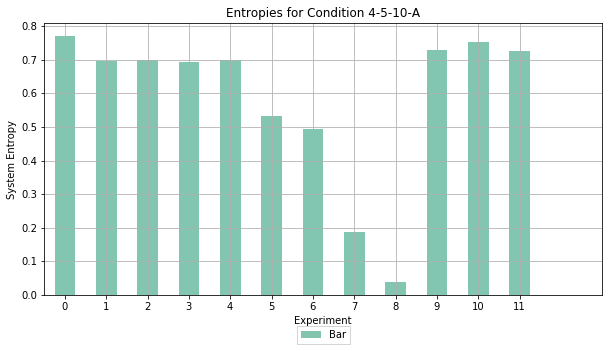

In [6]:
title = "Entropies for Condition 4-5-10-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "System Entropy"
legend = ["Bar"]
colour = '#078C62'
name = "entropy_4-5-10-A.png"

data = pd.DataFrame([avg_entropies]).T
plot_bar_chart_1(data, title, xlabel, xticklabels, ylabel, legend, colour, name)

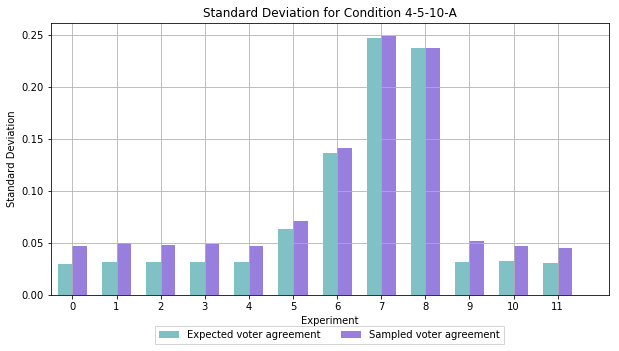

In [11]:
title = "Standard Deviation for Condition 4-5-10-A"
xlabel = "Experiment"
xticklabels = labels
ylabel = "Standard Deviation"
legend = ["Expected voter agreement", "Sampled voter agreement"]
colours = ['#00858C', '#3500BD']
name = "stds_4-5-10-A.png"

data = pd.DataFrame([expected_regrets_std, sampled_regrets_std]).T
plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)